Fundulus heteroclitus reference genome stats
============

Lisa K. Johnson

We have two versions of the *Fundulus heteroclitus* genome:
* [NCBI](https://www.ncbi.nlm.nih.gov/genome/?term=txid8078[orgn])
* [Don Gilbert (Indiana University), EvidentialGene](http://arthropods.eugenes.org/EvidentialGene/killifish/)

**Question: What genes are in common, which are unique?**

Notes:
* [GFF files for refseq and GenBank](https://whiteheadresearch.wordpress.com/protocols/)
* I made a repository in [OSF](https://osf.io/p7h4f/) for files from the [Whitehead lab website](https://whiteheadresearch.wordpress.com/protocols/) so they can be easily downloaded from the commandline:
[Fundulus_heteroclitus_genome_files](https://osf.io/p7h4f/)
* [NCBI genome record](https://www.ncbi.nlm.nih.gov/genome/743)
* NCBI GenBank files: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/826/765/GCA_000826765.1_Fundulus_heteroclitus-3.0.2
* NBCI RefSeq files: ftp://ftp.ncbi.nlm.nih.gov/genomes/Fundulus_heteroclitus/
* According to [NCBI](https://www.ncbi.nlm.nih.gov/assembly/model/), the prefix 'GCA' is used for for GenBank assemblies and 'GCF' for RefSeq assemblies. This is followed by an underscore and 9 digits.
* GenBank gene ids start with `KN` and RefSeq gene ids start with `10592...`

# Download files

In [1]:
!mkdir tmp_Fhet_files/

In [388]:
# OSF and evigene links
#!wget -O tmp_Fhet_files/kfish2rae5g.main.pub.mrna.gz http://arthropods.eugenes.org/EvidentialGene/killifish/Genes/kfish2rae5/kfish2rae5g.main.pub.mrna.gz \
#    && gunzip tmp_Fhet_files/kfish2rae5g.main.pub.mrna.gz
#!wget -O tmp_Fhet_files/kfish2rae5g.alt.pub.mrna.gz http://arthropods.eugenes.org/EvidentialGene/killifish/Genes/kfish2rae5/kfish2rae5g.alt.pub.mrna.gz \
#    && gunzip tmp_Fhet_files/kfish2rae5g.alt.pub.mrna.gz
#!wget -O tmp_Fhet_files/kfish2rae5g.mrna.combined.fa https://osf.io/xwzqj/download
#!wget -O tmp_Fhet_files/kfish2rae5g.main.pub.gff.gz http://arthropods.eugenes.org/EvidentialGene/killifish/Genes/kfish2rae5/kfish2rae5g.main.pub.gff.gz \
#    && gunzip tmp_Fhet_files/kfish2rae5g.main.pub.gff.gz
#!wget -O tmp_Fhet_files/kfish2rae5g.alt.pub.gff.gz http://arthropods.eugenes.org/EvidentialGene/killifish/Genes/kfish2rae5/kfish2rae5g.alt.pub.gff.gz \
#    && gunzip tmp_Fhet_files/kfish2rae5g.alt.pub.gff.gz
#!wget -O tmp_Fhet_files/heteroclitus_refseq_GBE_2017-05-12.gff https://osf.io/734fu/download
#!wget -O tmp_Fhet_files/heteroclitus_genbank_GBE_2017-05-12.gff https://osf.io/dxenz/download

In [387]:
# NCBI links (won't work on binder)
#!wget -O tmp_Fhet_files/GCF_000826765.1_Fundulus_heteroclitus-3.0.2_rna.fna.gz ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/826/765/GCF_000826765.1_Fundulus_heteroclitus-3.0.2/GCF_000826765.1_Fundulus_heteroclitus-3.0.2_rna.fna.gz \
#    && gunzip tmp_Fhet_files/GCF_000826765.1_Fundulus_heteroclitus-3.0.2_rna.fna.gz
#!wget -O tmp_Fhet_files/GCF_000826765.1_Fundulus_heteroclitus-3.0.2_genomic.gff.gz ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/826/765/GCF_000826765.1_Fundulus_heteroclitus-3.0.2/GCF_000826765.1_Fundulus_heteroclitus-3.0.2_genomic.gff.gz \
#    && gunzip tmp_Fhet_files/GCF_000826765.1_Fundulus_heteroclitus-3.0.2_genomic.gff.gz
#!wget -O tmp_Fhet_files/NCBI.rna.fa.gz ftp://ftp.ncbi.nlm.nih.gov/genomes/Fundulus_heteroclitus/RNA/rna.fa.gz \
#    && gunzip tmp_Fhet_files/NCBI.rna.fa.gz
#!wget -O tmp_Fhet_files/ref_Fundulus_heteroclitus-3.0.2_top_level.gff3.gz ftp://ftp.ncbi.nlm.nih.gov/genomes/Fundulus_heteroclitus/GFF/ref_Fundulus_heteroclitus-3.0.2_top_level.gff3.gz \
#    && gunzip tmp_Fhet_files/ref_Fundulus_heteroclitus-3.0.2_top_level.gff3.gz
#!wget -O tmp_Fhet_files/GCA_000826765.1_Fundulus_heteroclitus-3.0.2_genomic.gff.gz ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/826/765/GCA_000826765.1_Fundulus_heteroclitus-3.0.2/GCA_000826765.1_Fundulus_heteroclitus-3.0.2_genomic.gff.gz \
#    && gunzip ../tmp_Fhet_files/GCA_000826765.1_Fundulus_heteroclitus-3.0.2_genomic.gff.gz

# Look at the files you downloaded:

In [22]:
!ls -lah tmp_Fhet_files/

total 6241520
drwxr-xr-x  18 johnsolk  staff   576B Apr 25 10:16 .
drwxr-xr-x  31 johnsolk  staff   992B Apr 24 22:30 ..
-rw-r--r--   1 johnsolk  staff   3.1M Apr 25 10:16 GCA_000826765.1_Fundulus_heteroclitus-3.0.2_genomic.gff
-rw-r--r--   1 johnsolk  staff   302M Apr 23 11:07 GCF_000826765.1_Fundulus_heteroclitus-3.0.2_genomic.gff
-rw-r--r--   1 johnsolk  staff   130M Apr 23 11:07 GCF_000826765.1_Fundulus_heteroclitus-3.0.2_rna.fna
-rw-r--r--   1 johnsolk  staff   131M Apr 23 11:07 NCBI.rna.fa
-rw-r--r--@  1 johnsolk  staff   321M Apr 23 11:13 heteroclitus_genbank_GBE_2017-05-12.gff
-rw-r--r--@  1 johnsolk  staff   330M Apr 23 11:12 heteroclitus_refseq_GBE_2017-05-12.gff
-rw-r--r--   1 johnsolk  staff   307M Sep 13  2015 kf2sub5_fc18w.gff3
-rw-r--r--   1 johnsolk  staff   312M Sep 14  2015 kf2sub5_fc18w.gff3.liftdown
-rw-r--r--@  1 johnsolk  staff   3.0M Jun  7  2016 kfish2_genequal_evgncbi.txt
-rw-r--r--   1 johnsolk  staff   159M Jan  3  2014 kfish2rae5g.alt.pub.gff
-rw-r--r--   1 

# Comparison Stats and Visualizations

In [2]:
import pickle
import gzip
import pandas as pd
from dammit.fileio.gff3 import GFF3Parser

### NCBI, number of transcripts

These are transcriptome fasta files downloaded from NCBI. `GCF_000826765.1_Fundulus_heteroclitus-3.0.2_rna.fna` is from RefSeq and NCBI.rna.fa is from GenBank. Here are the number of transcripts they each contain. They should be the same: 41,170. 

In [3]:
!grep -c "^>" tmp_Fhet_files/GCF_000826765.1_Fundulus_heteroclitus-3.0.2_rna.fna

41170


In [4]:
!grep -c "^>" tmp_Fhet_files/NCBI.rna.fa

41170


### Don Gilbert, number of transcripts

These are the transcriptome fasta files from Don Gilbert. `kfish2rae5g.main.pub.mrna` contains "primary" transcripts and `kfish2rae5g.alt.pub.mrna` contains "alternative" transcripts, e.g. [isoforms and splice variants](https://www.molbiolcell.org/doi/abs/10.1091/mbc.e08-08-0890). I made the file `kfish2rae5g.mrna.combined.fa` by concatenating `kfish2rae5g.main.pub.mrna` and `kfish2rae5g.alt.pub.mrna` together. The sum of the two files should equal the number of transcripts in the combined file: 110,031.

In [5]:
!grep -c "^>" tmp_Fhet_files/kfish2rae5g.main.pub.mrna

34924


In [6]:
!grep -c "^>" tmp_Fhet_files/kfish2rae5g.alt.pub.mrna

75107


In [7]:
!grep -c "^>" tmp_Fhet_files/kfish2rae5g.mrna.combined.fa

110031


# Gene names

([gff](https://uswest.ensembl.org/info/website/upload/gff.html) stands for 'general feature format')

### Don Gilbert's gene names

These are the gene names in Don Gilbert's gff file. 

In [9]:
DonGilbert_annotations_main = GFF3Parser(filename="tmp_Fhet_files/kfish2rae5g.main.pub.gff").read()

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/dammit/fileio/gff3.py:73: ParserWarning: Both a converter and dtype were specified for column attributes - only the converter will be used
  dtype=dict(self.columns)):


In [111]:
#creates a "pickle" file, Python data storage file
#DonGilbert_annotations_main.to_pickle("kfish2rae5g.main.pub.gff.pickle",compression='gzip')

In [112]:
#load the pickle next time:
#DonGilbert_annotations_pickle = pd.read_pickle("kfish2rae5g.main.pub.gff.pickle",compression='gzip')
#DonGilbert_annotations_main = DonGilbert_annotations_pickle

Number of unique transcripts:

In [11]:
print(len(pd.unique(DonGilbert_annotations_main['Parent'].dropna())))

34925


Column headers in gff:

In [12]:
DonGilbert_annotations_main.columns

Index(['Dbxref', 'ID', 'Name', 'Parent', 'Split', 'aaSize', 'cdsSize', 'end',
       'equiv1', 'error', 'express', 'gene', 'genegroup', 'groupname',
       'intron', 'isoform', 'mapCover', 'oid', 'oname', 'ortholog', 'paralog',
       'phase', 'quality', 'score_x', 'score_y', 'seqid', 'source', 'start',
       'strand', 'type'],
      dtype='object')

Subset all gff features into only unique 'ID', 'Name' and 'gene'. 
* 'ID' is the transcript ID
* 'Name' is gene name 
* 'gene' is gene ID

In [13]:
DonGilbert_genenames_main = DonGilbert_annotations_main.dropna(subset=['ID','Name','gene']).drop_duplicates(subset='ID')[['ID','Name','gene']]

Still, the same number of transcripts:

In [14]:
print(DonGilbert_genenames_main.shape)

(34925, 3)


In [15]:
print(DonGilbert_genenames_main.head())

                    ID                                               Name  \
1    Funhe2EKm000003t1                      Homeobox protein CDX-1 (91%P)   
9    Funhe2EKm000004t1  Platelet-derived growth factor receptor, beta ...   
56   Funhe2EKm000005t1  Vascular endothelial growth factor receptor kd...   
105  Funhe2EKm000221t1       Component of oligomeric golgi complex (90%P)   
136  Funhe2EKm000006t1                  HMG box domain containing (100%P)   

                gene  
1    Funhe2EKm000003  
9    Funhe2EKm000004  
56   Funhe2EKm000005  
105  Funhe2EKm000221  
136  Funhe2EKm000006  


In [20]:
DonGilbert_annotations_alt = GFF3Parser(filename="tmp_Fhet_files/kfish2rae5g.alt.pub.gff").read()

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/dammit/fileio/gff3.py:73: ParserWarning: Both a converter and dtype were specified for column attributes - only the converter will be used
  dtype=dict(self.columns)):


In [21]:
print(len(pd.unique(DonGilbert_annotations_alt['Parent'].dropna())))

75210


In [22]:
DonGilbert_genenames_alt = DonGilbert_annotations_alt.dropna(subset=['ID','Name','gene']).drop_duplicates(subset='ID')[['ID','Name','gene']]

In [23]:
print(DonGilbert_genenames_alt.shape)

(75228, 3)


In [24]:
print(DonGilbert_genenames_alt.head())

                   ID                                               Name  \
1   Funhe2EKm004814t2                  60S ribosomal protein L26 (100%M)   
9   Funhe2EKm004814t3                   60S ribosomal protein L26 (73%M)   
17  Funhe2EKm004814t4                            Uncharacterized protein   
29  Funhe2EKm000057t2  Down syndrome cell adhesion molecule protein D...   
42  Funhe2EKm000057t3  Down syndrome cell adhesion molecule protein D...   

               gene  
1   Funhe2EKm004814  
9   Funhe2EKm004814  
17  Funhe2EKm004814  
29  Funhe2EKm000057  
42  Funhe2EKm000057  


In [25]:
combined_DonGilbert_annotations = pd.concat([DonGilbert_genenames_alt,DonGilbert_genenames_main])

In [26]:
print(combined_DonGilbert_annotations.shape)
print(combined_DonGilbert_annotations.head())
genes_combined = combined_DonGilbert_annotations.drop_duplicates(subset="gene")
print(genes_combined.shape)

(110153, 3)
                   ID                                               Name  \
1   Funhe2EKm004814t2                  60S ribosomal protein L26 (100%M)   
9   Funhe2EKm004814t3                   60S ribosomal protein L26 (73%M)   
17  Funhe2EKm004814t4                            Uncharacterized protein   
29  Funhe2EKm000057t2  Down syndrome cell adhesion molecule protein D...   
42  Funhe2EKm000057t3  Down syndrome cell adhesion molecule protein D...   

               gene  
1   Funhe2EKm004814  
9   Funhe2EKm004814  
17  Funhe2EKm004814  
29  Funhe2EKm000057  
42  Funhe2EKm000057  
(34985, 3)


### NCBI gene names
These are the gene names in the RefSeq gff file. 

In [27]:
RefSeq_NCBI_annotations = GFF3Parser(filename="tmp_Fhet_files/ref_Fundulus_heteroclitus-3.0.2_top_level.gff3").read()

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/dammit/fileio/gff3.py:73: ParserWarning: Both a converter and dtype were specified for column attributes - only the converter will be used
  dtype=dict(self.columns)):


In [53]:
# creates a pickle
# RefSeq_NCBI_annotations.to_pickle("ref_Fundulus_heteroclitus-3.0.2_top_level.gff3.pickle",compression='gzip')

In [114]:
#load the pickle next time:
#RefSeq_NCBI_annotations_pickle = pd.read_pickle("ref_Fundulus_heteroclitus-3.0.2_top_level.gff3.pickle",compression='gzip')
#RefSeq_NCBI_annotations = RefSeq_NCBI_annotations_pickle

In [115]:
print(RefSeq_NCBI_annotations.head())

                                    Dbxref  Gap     ID Is_circular  \
0                               taxon:8078  NaN    id0         NaN   
1                         GeneID:105920463  NaN  gene0         NaN   
2  GeneID:105920463,Genbank:XM_012856390.2  NaN   rna0         NaN   
3  GeneID:105920463,Genbank:XM_012856390.2  NaN    id1         NaN   
4  GeneID:105920463,Genbank:XM_012856390.2  NaN    id2         NaN   

             Name Note Parent Target anticodon chromosome        ...         \
0         Unknown  NaN    NaN    NaN       NaN    Unknown        ...          
1            cdx1  NaN    NaN    NaN       NaN        NaN        ...          
2  XM_012856390.2  NaN  gene0    NaN       NaN        NaN        ...          
3             NaN  NaN   rna0    NaN       NaN        NaN        ...          
4             NaN  NaN   rna0    NaN       NaN        NaN        ...          

  splices standard_name  start start_range  strand   transcript_id  \
0     NaN           NaN      0    

In [29]:
RefSeq_NCBI_annotations.columns

Index(['Dbxref', 'Gap', 'ID', 'Is_circular', 'Name', 'Note', 'Parent',
       'Target', 'anticodon', 'chromosome', 'codons', 'collected-by',
       'consensus_splices', 'description', 'end', 'end_range', 'exception',
       'exon_identity', 'for_remapping', 'gap_count', 'gbkey', 'gene',
       'gene_biotype', 'gene_synonym', 'genome', 'identity', 'idty',
       'inference', 'isolate', 'lat-lon', 'matches', 'model_evidence',
       'mol_type', 'num_ident', 'num_mismatch', 'partial', 'pct_coverage',
       'pct_coverage_hiqual', 'pct_identity_gap', 'pct_identity_ungap',
       'phase', 'pop-variant', 'product', 'product_coverage', 'protein_id',
       'pseudo', 'rank', 'score', 'seqid', 'sex', 'source', 'splices',
       'standard_name', 'start', 'start_range', 'strand', 'transcript_id',
       'transl_except', 'transl_table', 'type', 'weighted_identity'],
      dtype='object')

In [30]:
RefSeq_NCBI_annotations.head()

,Dbxref,Gap,ID,Is_circular,Name,Note,Parent,Target,anticodon,chromosome,...,splices,standard_name,start,start_range,strand,transcript_id,transl_except,transl_table,type,weighted_identity
0,taxon:8078,NaN,id0,NaN,Unknown,NaN,NaN,NaN,NaN,Unknown,...,NaN,NaN,0,NaN,+,NaN,NaN,NaN,region,NaN
1,GeneID:105920463,NaN,gene0,NaN,cdx1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5029,NaN,-,NaN,NaN,NaN,gene,NaN
2,"GeneID:105920463,Genbank:XM_012856390.2",NaN,rna0,NaN,XM_012856390.2,NaN,gene0,NaN,NaN,NaN,...,NaN,NaN,5029,NaN,-,XM_012856390.2,NaN,NaN,mRNA,NaN
3,"GeneID:105920463,Genbank:XM_012856390.2",NaN,id1,NaN,NaN,NaN,rna0,NaN,NaN,NaN,...,NaN,NaN,10044,NaN,-,XM_012856390.2,NaN,NaN,exon,NaN
4,"GeneID:105920463,Genbank:XM_012856390.2",NaN,id2,NaN,NaN,NaN,rna0,NaN,NaN,NaN,...,NaN,NaN,8334,NaN,-,XM_012856390.2,NaN,NaN,exon,NaN


In [31]:
RefSeq_NCBI_genenames = RefSeq_NCBI_annotations.dropna(subset=['seqid','Dbxref','transcript_id']).drop_duplicates(subset='Dbxref')[['seqid','Dbxref','transcript_id']]

Parse ‘Dbxref’ to get unique GENE ID from NCBI.

In [32]:
print(RefSeq_NCBI_genenames.shape)

(41170, 3)


In [33]:
print(RefSeq_NCBI_genenames.head())

              seqid                                   Dbxref   transcript_id
2    NW_012224401.1  GeneID:105920463,Genbank:XM_012856390.2  XM_012856390.2
10   NW_012224401.1  GeneID:105915213,Genbank:XM_021321288.1  XM_021321288.1
54   NW_012224401.1  GeneID:105915271,Genbank:XM_012849362.2  XM_012849362.2
98   NW_012224401.1  GeneID:105915271,Genbank:XM_012849437.2  XM_012849437.2
143  NW_012224401.1  GeneID:105915419,Genbank:XM_021323826.1  XM_021323826.1


In [34]:
RefSeq_NCBI_genenames['split_1'], RefSeq_NCBI_genenames['split_2'], RefSeq_NCBI_genenames['split_3'] = RefSeq_NCBI_genenames['Dbxref'].str.split(':',0).str

In [35]:
print(RefSeq_NCBI_genenames.head())

              seqid                                   Dbxref   transcript_id  \
2    NW_012224401.1  GeneID:105920463,Genbank:XM_012856390.2  XM_012856390.2   
10   NW_012224401.1  GeneID:105915213,Genbank:XM_021321288.1  XM_021321288.1   
54   NW_012224401.1  GeneID:105915271,Genbank:XM_012849362.2  XM_012849362.2   
98   NW_012224401.1  GeneID:105915271,Genbank:XM_012849437.2  XM_012849437.2   
143  NW_012224401.1  GeneID:105915419,Genbank:XM_021323826.1  XM_021323826.1   

    split_1            split_2         split_3  
2    GeneID  105920463,Genbank  XM_012856390.2  
10   GeneID  105915213,Genbank  XM_021321288.1  
54   GeneID  105915271,Genbank  XM_012849362.2  
98   GeneID  105915271,Genbank  XM_012849437.2  
143  GeneID  105915419,Genbank  XM_021323826.1  


In [36]:
RefSeq_NCBI_genenames_sub = RefSeq_NCBI_genenames[(RefSeq_NCBI_genenames["split_1"] == 'GeneID')]
print(RefSeq_NCBI_genenames_sub.head())

              seqid                                   Dbxref   transcript_id  \
2    NW_012224401.1  GeneID:105920463,Genbank:XM_012856390.2  XM_012856390.2   
10   NW_012224401.1  GeneID:105915213,Genbank:XM_021321288.1  XM_021321288.1   
54   NW_012224401.1  GeneID:105915271,Genbank:XM_012849362.2  XM_012849362.2   
98   NW_012224401.1  GeneID:105915271,Genbank:XM_012849437.2  XM_012849437.2   
143  NW_012224401.1  GeneID:105915419,Genbank:XM_021323826.1  XM_021323826.1   

    split_1            split_2         split_3  
2    GeneID  105920463,Genbank  XM_012856390.2  
10   GeneID  105915213,Genbank  XM_021321288.1  
54   GeneID  105915271,Genbank  XM_012849362.2  
98   GeneID  105915271,Genbank  XM_012849437.2  
143  GeneID  105915419,Genbank  XM_021323826.1  


In [37]:
RefSeq_NCBI_genenames_sub['GeneID'], RefSeq_NCBI_genenames_sub['Genbank'] = RefSeq_NCBI_genenames_sub['split_2'].str.split(',', 0).str

In [38]:
print(RefSeq_NCBI_genenames_sub.head())

              seqid                                   Dbxref   transcript_id  \
2    NW_012224401.1  GeneID:105920463,Genbank:XM_012856390.2  XM_012856390.2   
10   NW_012224401.1  GeneID:105915213,Genbank:XM_021321288.1  XM_021321288.1   
54   NW_012224401.1  GeneID:105915271,Genbank:XM_012849362.2  XM_012849362.2   
98   NW_012224401.1  GeneID:105915271,Genbank:XM_012849437.2  XM_012849437.2   
143  NW_012224401.1  GeneID:105915419,Genbank:XM_021323826.1  XM_021323826.1   

    split_1            split_2         split_3     GeneID  Genbank  
2    GeneID  105920463,Genbank  XM_012856390.2  105920463  Genbank  
10   GeneID  105915213,Genbank  XM_021321288.1  105915213  Genbank  
54   GeneID  105915271,Genbank  XM_012849362.2  105915271  Genbank  
98   GeneID  105915271,Genbank  XM_012849437.2  105915271  Genbank  
143  GeneID  105915419,Genbank  XM_021323826.1  105915419  Genbank  


In [41]:
geneID_unique_scaffold = RefSeq_NCBI_genenames_sub.dropna(subset=['GeneID','seqid','transcript_id']).drop_duplicates(subset='seqid')[['GeneID','seqid','transcript_id']]
print(geneID_unique_scaffold.head())
print(geneID_unique_scaffold.shape)

          GeneID           seqid   transcript_id
2      105920463  NW_012224401.1  XM_012856390.2
7500   105932240  NW_012224402.1  XM_021322060.1
13527  105915837  NW_012224403.1  XM_021309415.1
17167  105916749  NW_012224404.1  XM_021310176.1
21573  110366941  NW_012224405.1  XM_021310901.1
(3260, 3)


In [42]:
geneID = RefSeq_NCBI_genenames_sub.dropna(subset=['GeneID','seqid','transcript_id']).drop_duplicates(subset='GeneID')[['GeneID','seqid','transcript_id']]
print(geneID.head())
print(geneID.shape)

        GeneID           seqid   transcript_id
2    105920463  NW_012224401.1  XM_012856390.2
10   105915213  NW_012224401.1  XM_021321288.1
54   105915271  NW_012224401.1  XM_012849362.2
143  105915419  NW_012224401.1  XM_021323826.1
228  110366472  NW_012224401.1  XM_021307801.1
(25600, 3)


In [43]:
transcript_ID = RefSeq_NCBI_genenames_sub.dropna(subset=['GeneID','seqid','transcript_id']).drop_duplicates(subset='transcript_id')[['GeneID','seqid','transcript_id']]
print(transcript_ID.head())
print(transcript_ID.shape)

        GeneID           seqid   transcript_id
2    105920463  NW_012224401.1  XM_012856390.2
10   105915213  NW_012224401.1  XM_021321288.1
54   105915271  NW_012224401.1  XM_012849362.2
98   105915271  NW_012224401.1  XM_012849437.2
143  105915419  NW_012224401.1  XM_021323826.1
(41170, 3)


In [45]:
protein_ID = RefSeq_NCBI_annotations.dropna(subset=['protein_id','seqid','product','gene']).drop_duplicates(subset='protein_id')[['protein_id','seqid','product','gene']]
print(protein_ID.head())
print(protein_ID.shape)

         protein_id           seqid  \
6    XP_012711844.1  NW_012224401.1   
32   XP_021176963.1  NW_012224401.1   
77   XP_012704816.1  NW_012224401.1   
121  XP_012704891.1  NW_012224401.1   
165  XP_021179501.1  NW_012224401.1   

                                             product    gene  
6                             homeobox protein CDX-1    cdx1  
32      platelet-derived growth factor receptor beta  pdgfrb  
77   macrophage colony-stimulating factor 1 receptor   csf1r  
121  macrophage colony-stimulating factor 1 receptor   csf1r  
165       HMG domain-containing protein 3 isoform X1  hmgxb3  
(38234, 4)


In [46]:
#merge protein ID and transcript ID
protein_transcript = pd.merge(protein_ID,transcript_ID,how="inner",on="seqid").dropna()
print(protein_transcript.shape)
print(protein_transcript.head())

(3042359, 6)
       protein_id           seqid                 product  gene     GeneID  \
0  XP_012711844.1  NW_012224401.1  homeobox protein CDX-1  cdx1  105920463   
1  XP_012711844.1  NW_012224401.1  homeobox protein CDX-1  cdx1  105915213   
2  XP_012711844.1  NW_012224401.1  homeobox protein CDX-1  cdx1  105915271   
3  XP_012711844.1  NW_012224401.1  homeobox protein CDX-1  cdx1  105915271   
4  XP_012711844.1  NW_012224401.1  homeobox protein CDX-1  cdx1  105915419   

    transcript_id  
0  XM_012856390.2  
1  XM_021321288.1  
2  XM_012849362.2  
3  XM_012849437.2  
4  XM_021323826.1  


In [48]:
print("Number of unique scaffold ID ('NW_') :",len(pd.unique(RefSeq_NCBI_annotations['seqid'].dropna())))
print("Number of unique transcripts ('XM_') :",len(pd.unique(RefSeq_NCBI_annotations['transcript_id'].dropna())))
print("Number of unique protein ID ('XP_') :",len(pd.unique(RefSeq_NCBI_annotations['protein_id'].dropna())))
print("Number of unique gene ID (parsed from 'Dbxref') :",len(geneID))

Number of unique scaffold ID ('NW_') : 10180
Number of unique transcripts ('XM_') : 41170
Number of unique protein ID ('XP_') : 38234
Number of unique gene ID (parsed from 'Dbxref') : 25600


### Whitehead lab website conversion file
Conversion file to connect NCBI with his verison of the F. heteroclitus genome. 
* Made by Don Gilbert with a custom .pl script
* The connection between NCBI and his assembly gene models required setting what he calls "exon location equivalences", which are based on positions on the scaffold between assemblies. 
* See this [equiv](http://arthropods.eugenes.org/EvidentialGene/killifish/submitset/genome_annotation/kfish2_genequal_evgncbi.txt) file for transcript ID to Don Gilbert's ID

In [49]:
WhiteheadLab_conversions = GFF3Parser(filename="tmp_Fhet_files/heteroclitus_refseq_GBE_2017-05-12.gff").read()

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/dammit/fileio/gff3.py:73: ParserWarning: Both a converter and dtype were specified for column attributes - only the converter will be used
  dtype=dict(self.columns)):


In [176]:
# make a pickle file
# WhiteheadLab_conversions.to_pickle("heteroclitus_refseq_GBE_2017-05-12.gff.pickle",compression='gzip')

In [116]:
#load the pickle next time:
#WhiteheadLab_conversions_pickle = pd.read_pickle("heteroclitus_refseq_GBE_2017-05-12.gff.pickle",compression='gzip')
#WhiteheadLab_conversions = WhiteheadLab_conversions_pickle

In [117]:
print(WhiteheadLab_conversions.shape)

(2185530, 58)


In [51]:
print(WhiteheadLab_conversions.columns)

Index(['', 'Dbxref', 'ID', 'Name', 'Parent', 'Split', 'Target', 'aalen',
       'bestaa', 'cdsfix', 'cdsoff', 'cxlen', 'end', 'equiv1', 'error', 'est',
       'express', 'gapfill', 'gapfix', 'gapnofix', 'gene', 'genegroup', 'ggap',
       'insrc', 'intr', 'intron', 'isoform', 'ix', 'locustag', 'lold',
       'mapCover', 'mgap', 'must', 'namepct', 'nameref', 'nexon', 'oid',
       'ortholog', 'osrc', 'paralog', 'phase', 'pod', 'problem', 'protein',
       'quality', 'rseq', 'scold1', 'score', 'seqid', 'source', 'splitdupid',
       'start', 'strand', 'swapmain', 'tblan', 'terepeat', 'trg', 'type'],
      dtype='object')


In [52]:
print(WhiteheadLab_conversions.head())

                                                   Dbxref                 ID  \
0  NaN                                                NaN    Funhe2EKm000003   
1  NaN  CDD:200956,TrEMBL:UniRef50_Q90423,TrEMBL:HXB1B...  Funhe2EKm000003t1   
2  NaN                                                NaN                NaN   
3  NaN                                                NaN                NaN   
4  NaN                                                NaN                NaN   

       Name             Parent Split Target aalen bestaa cdsfix  ...   \
0       NaN                NaN   NaN    NaN   NaN    NaN    NaN  ...    
1  Homeobox                NaN   NaN    NaN   NaN    NaN    NaN  ...    
2       NaN  Funhe2EKm000003t1   NaN    NaN   NaN    NaN    NaN  ...    
3       NaN  Funhe2EKm000003t1   NaN    NaN   NaN    NaN    NaN  ...    
4       NaN  Funhe2EKm000003t1   NaN    NaN   NaN    NaN    NaN  ...    

            seqid    source  splitdupid start strand swapmain tblan terepeat  \


In [53]:
Whiteheadlab_scaffolds = WhiteheadLab_conversions.dropna(subset=['seqid']).drop_duplicates(subset='seqid')[['seqid']]
print(Whiteheadlab_scaffolds.shape)

(4496, 1)


In [54]:
print(Whiteheadlab_scaffolds.head())

                seqid
0      NW_012224401.1
14838  NW_012224402.1
25205  NW_012224403.1
33369  NW_012224404.1
40334  NW_012224405.1


In [67]:
Whiteheadlab_genenames = WhiteheadLab_conversions.dropna(subset=['ID','gene']).drop_duplicates(subset='ID')[['locustag','Name','ID','gene','seqid']]

In [68]:
Whiteheadlab_genenames.shape

(98067, 5)

#### What transcripts are unique in Don Gilbert's annotations?
Which id are we missing in the conversion file?

In [69]:
print("Conversion file:",Whiteheadlab_genenames.shape)
print("NCBI, transcripts:",transcript_ID.shape)
print("NCBI, proteins:",protein_ID.shape)
print("Don Gilbert:",combined_DonGilbert_annotations.shape)

Conversion file: (98067, 5)
NCBI, transcripts: (41170, 3)
NCBI, proteins: (38234, 4)
Don Gilbert: (110153, 3)


In [70]:
Whiteheadlab_genenames.head()

,locustag,Name,ID,gene,seqid
1,Funhe2EKm000003,Homeobox,Funhe2EKm000003t1,Funhe2EKm000003,NW_012224401.1
9,Funhe2EKm000004,Platelet-derived,Funhe2EKm000004t1,Funhe2EKm000004,NW_012224401.1
55,Funhe2EKm000004,Platelet-derived,Funhe2EKm000004t2,Funhe2EKm000004,NW_012224401.1
97,Funhe2EKm000004,Platelet-derived,Funhe2EKm000004t3,Funhe2EKm000004,NW_012224401.1
136,Funhe2EKm000004,Platelet-derived,Funhe2EKm000004t4,Funhe2EKm000004,NW_012224401.1


In [71]:
transcript_ID.head()

,GeneID,seqid,transcript_id
2,105920463,NW_012224401.1,XM_012856390.2
10,105915213,NW_012224401.1,XM_021321288.1
54,105915271,NW_012224401.1,XM_012849362.2
98,105915271,NW_012224401.1,XM_012849437.2
143,105915419,NW_012224401.1,XM_021323826.1


In [72]:
combined_DonGilbert_annotations.head()

,ID,Name,gene
1,Funhe2EKm004814t2,60S ribosomal protein L26 (100%M),Funhe2EKm004814
9,Funhe2EKm004814t3,60S ribosomal protein L26 (73%M),Funhe2EKm004814
17,Funhe2EKm004814t4,Uncharacterized protein,Funhe2EKm004814
29,Funhe2EKm000057t2,Down syndrome cell adhesion molecule protein D...,Funhe2EKm000057
42,Funhe2EKm000057t3,Down syndrome cell adhesion molecule protein D...,Funhe2EKm000057


In [73]:
protein_ID.head()
print(protein_ID.shape)

(38234, 4)


In [75]:
# get scaffold ID and Funhe gene ID 
scaffold_NW_ncbi = set(RefSeq_NCBI_annotations['seqid'])
scaffold_NW_conversion = set(Whiteheadlab_scaffolds['seqid'])
geneID_Funhe2EK_DG = set(combined_DonGilbert_annotations['gene'])
geneID_Funhe2EK_overlap = set(Whiteheadlab_genenames['gene'])
transcriptID_Funhe2EK_DG = set(combined_DonGilbert_annotations['ID'])
transcriptID_Funhe2EK_overlap = set(Whiteheadlab_genenames['ID'])

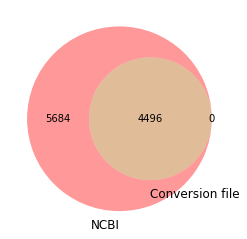

In [77]:
%matplotlib inline
import pylab as plt
from matplotlib_venn import venn2
venn2(subsets = (len(scaffold_NW_ncbi)-len(scaffold_NW_ncbi.intersection(scaffold_NW_conversion)), 
                 len(scaffold_NW_conversion)-len(scaffold_NW_ncbi.intersection(scaffold_NW_conversion)), 
                 len(scaffold_NW_ncbi.intersection(scaffold_NW_conversion))), 
      set_labels = ('NCBI', 'Conversion file'))
plt.show()

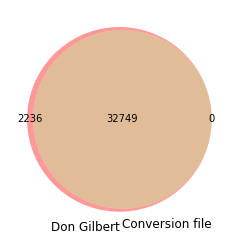

In [78]:
venn2(subsets = (len(geneID_Funhe2EK_DG)-len(geneID_Funhe2EK_DG.intersection(geneID_Funhe2EK_overlap)), 
                 len(geneID_Funhe2EK_overlap)-len(geneID_Funhe2EK_DG.intersection(geneID_Funhe2EK_overlap)), 
                 len(geneID_Funhe2EK_DG.intersection(geneID_Funhe2EK_overlap))), 
      set_labels = ('Don Gilbert', 'Conversion file'))
plt.show()

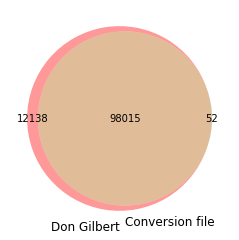

In [79]:
venn2(subsets = (len(transcriptID_Funhe2EK_DG)-len(transcriptID_Funhe2EK_DG.intersection(transcriptID_Funhe2EK_overlap)), 
                 len(transcriptID_Funhe2EK_overlap)-len(transcriptID_Funhe2EK_DG.intersection(transcriptID_Funhe2EK_overlap)), 
                 len(transcriptID_Funhe2EK_DG.intersection(transcriptID_Funhe2EK_overlap))), 
      set_labels = ('Don Gilbert', 'Conversion file'))
plt.show()

In [80]:
convert_table = pd.read_table("http://arthropods.eugenes.org/EvidentialGene/killifish/submitset/genome_annotation/kfish2_genequal_evgncbi.txt")

In [81]:
print(convert_table.head())

      Funhe_GeneID      NCBI_TSA       NCBI_Nucl  NCBI_GeneID  pEqual  \
0  Funhe2EKm000003  GCES01000180  XM_012856390.1    105920463   93.80   
1  Funhe2EKm000004  GCES01150243  XM_012853081.1    105915213   95.64   
2  Funhe2EKm000005  GCES01154538  XM_012849437.1    105915271   99.98   
3  Funhe2EKm000006  GCES01000182  XM_012849553.1    105915419   99.96   
4  Funhe2EKm000007  GCES01150244  XM_012849668.1    105915503  100.58   

        Funhe_TranID             Funhe_OID  
0  Funhe2EKm000003t1  Funhe2Exx11m027882t1  
1  Funhe2EKm000004t1  Funhe2Exx11m002607t1  
2  Funhe2EKm000005t3  Funhe2Exx11m003308t2  
3  Funhe2EKm000006t1  Funhe2Exx11m001896t4  
4  Funhe2EKm000007t1  Funhe2Exx11m019598t1  


In [82]:
convert_table_genenames = convert_table.drop_duplicates(subset='Funhe_TranID')

In [83]:
print(convert_table_genenames.shape)

(34924, 7)


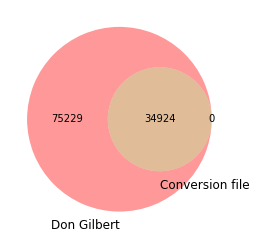

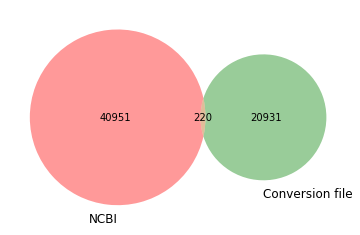

In [84]:
transcriptID_XM_DG = set(combined_DonGilbert_annotations['ID'])
transcriptID_XM_convert = set(convert_table['Funhe_TranID'])
venn2(subsets = (len(transcriptID_XM_DG)-len(transcriptID_XM_convert.intersection(transcriptID_XM_DG)), 
                 len(transcriptID_XM_convert)-len(transcriptID_XM_convert.intersection(transcriptID_XM_DG)), 
                 len(transcriptID_XM_convert.intersection(transcriptID_XM_DG))), 
      set_labels = ('Don Gilbert', 'Conversion file'))
plt.show()
transcriptID_XM_ncbi = set(RefSeq_NCBI_annotations['transcript_id'])
transcriptID_XM_convert = set(convert_table['NCBI_Nucl'])
venn2(subsets = (len(transcriptID_XM_ncbi)-len(transcriptID_XM_convert.intersection(transcriptID_XM_ncbi)), 
                 len(transcriptID_XM_convert)-len(transcriptID_XM_convert.intersection(transcriptID_XM_ncbi)), 
                 len(transcriptID_XM_convert.intersection(transcriptID_XM_ncbi))), 
      set_labels = ('NCBI', 'Conversion file'))
plt.show()

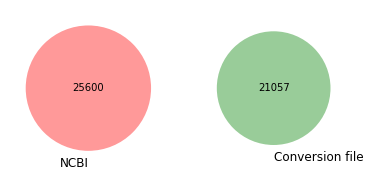

In [85]:
#protein_connection = pd.merge(protein_transcript, convert_table,how='outer',left_on='seqid',right_on='NCBI_')
transcriptID_GeneID_ncbi = set(RefSeq_NCBI_genenames_sub['GeneID'])
transcriptID_GeneID_convert = set(convert_table['NCBI_GeneID'])
venn2(subsets = (len(transcriptID_GeneID_ncbi)-len(transcriptID_GeneID_convert.intersection(transcriptID_GeneID_ncbi)), 
                 len(transcriptID_GeneID_convert)-len(transcriptID_GeneID_convert.intersection(transcriptID_GeneID_ncbi)), 
                 len(transcriptID_GeneID_convert.intersection(transcriptID_GeneID_ncbi))), 
      set_labels = ('NCBI', 'Conversion file'))
plt.show()

### Merge dataframes
Connecting protein id ('XP') since that is that I annotted with, NCBI transcript id ('XM'), Don Gilbert transcript id ('Funhe2EKm000003t1..x') and gene names

In [86]:
print(protein_ID.shape)
print(combined_DonGilbert_annotations.shape)

(38234, 4)
(110153, 3)


In [87]:
protein_ID.head()

,protein_id,seqid,product,gene
6,XP_012711844.1,NW_012224401.1,homeobox protein CDX-1,cdx1
32,XP_021176963.1,NW_012224401.1,platelet-derived growth factor receptor beta,pdgfrb
77,XP_012704816.1,NW_012224401.1,macrophage colony-stimulating factor 1 receptor,csf1r
121,XP_012704891.1,NW_012224401.1,macrophage colony-stimulating factor 1 receptor,csf1r
165,XP_021179501.1,NW_012224401.1,HMG domain-containing protein 3 isoform X1,hmgxb3


In [88]:
combined_DonGilbert_annotations.head()

,ID,Name,gene
1,Funhe2EKm004814t2,60S ribosomal protein L26 (100%M),Funhe2EKm004814
9,Funhe2EKm004814t3,60S ribosomal protein L26 (73%M),Funhe2EKm004814
17,Funhe2EKm004814t4,Uncharacterized protein,Funhe2EKm004814
29,Funhe2EKm000057t2,Down syndrome cell adhesion molecule protein D...,Funhe2EKm000057
42,Funhe2EKm000057t3,Down syndrome cell adhesion molecule protein D...,Funhe2EKm000057


In [89]:
print(protein_transcript.shape)
protein_transcript.head()

(3042359, 6)


,protein_id,seqid,product,gene,GeneID,transcript_id
0,XP_012711844.1,NW_012224401.1,homeobox protein CDX-1,cdx1,105920463,XM_012856390.2
1,XP_012711844.1,NW_012224401.1,homeobox protein CDX-1,cdx1,105915213,XM_021321288.1
2,XP_012711844.1,NW_012224401.1,homeobox protein CDX-1,cdx1,105915271,XM_012849362.2
3,XP_012711844.1,NW_012224401.1,homeobox protein CDX-1,cdx1,105915271,XM_012849437.2
4,XP_012711844.1,NW_012224401.1,homeobox protein CDX-1,cdx1,105915419,XM_021323826.1


In [90]:
print(convert_table.shape)
convert_table.head()

(34924, 7)


,Funhe_GeneID,NCBI_TSA,NCBI_Nucl,NCBI_GeneID,pEqual,Funhe_TranID,Funhe_OID
0,Funhe2EKm000003,GCES01000180,XM_012856390.1,105920463,93.80,Funhe2EKm000003t1,Funhe2Exx11m027882t1
1,Funhe2EKm000004,GCES01150243,XM_012853081.1,105915213,95.64,Funhe2EKm000004t1,Funhe2Exx11m002607t1
2,Funhe2EKm000005,GCES01154538,XM_012849437.1,105915271,99.98,Funhe2EKm000005t3,Funhe2Exx11m003308t2
3,Funhe2EKm000006,GCES01000182,XM_012849553.1,105915419,99.96,Funhe2EKm000006t1,Funhe2Exx11m001896t4
4,Funhe2EKm000007,GCES01150244,XM_012849668.1,105915503,100.58,Funhe2EKm000007t1,Funhe2Exx11m019598t1


Need to strip characters after the decimal in "XM" because they are different

In [91]:
protein_transcript['transcript_ID_split_1'], protein_transcript['transcript_ID_split_2'] = protein_transcript['transcript_id'].str.split('.',0).str
convert_table['transcript_ID_split_1'], convert_table['transcript_ID_split_2'] = convert_table['NCBI_Nucl'].str.split('.',0).str

Then combine NCBI and Don Gilbert's IDs.

In [92]:
protein_connection = pd.merge(protein_transcript, convert_table,how='outer',on='transcript_ID_split_1')
protein_connection = pd.merge(protein_connection,combined_DonGilbert_annotations,how = 'inner',left_on = 'Funhe_TranID',right_on='ID')
protein_connection.shape

(1139717, 19)

In [393]:
protein_connection.head()

,protein_id,seqid,product,gene_x,GeneID,transcript_id,transcript_ID_split_1,transcript_ID_split_2_x,Funhe_GeneID,NCBI_TSA,NCBI_Nucl,NCBI_GeneID,pEqual,Funhe_TranID,Funhe_OID,transcript_ID_split_2_y,ID,Name,gene_y
0,XP_012711844.1,NW_012224401.1,homeobox protein CDX-1,cdx1,105920463,XM_012856390.2,XM_012856390,2,Funhe2EKm000003,GCES01000180,XM_012856390.1,105920463.0,93.8,Funhe2EKm000003t1,Funhe2Exx11m027882t1,1,Funhe2EKm000003t1,Homeobox protein CDX-1 (91%P),Funhe2EKm000003
1,XP_021176963.1,NW_012224401.1,platelet-derived growth factor receptor beta,pdgfrb,105920463,XM_012856390.2,XM_012856390,2,Funhe2EKm000003,GCES01000180,XM_012856390.1,105920463.0,93.8,Funhe2EKm000003t1,Funhe2Exx11m027882t1,1,Funhe2EKm000003t1,Homeobox protein CDX-1 (91%P),Funhe2EKm000003
2,XP_012704816.1,NW_012224401.1,macrophage colony-stimulating factor 1 receptor,csf1r,105920463,XM_012856390.2,XM_012856390,2,Funhe2EKm000003,GCES01000180,XM_012856390.1,105920463.0,93.8,Funhe2EKm000003t1,Funhe2Exx11m027882t1,1,Funhe2EKm000003t1,Homeobox protein CDX-1 (91%P),Funhe2EKm000003
3,XP_012704891.1,NW_012224401.1,macrophage colony-stimulating factor 1 receptor,csf1r,105920463,XM_012856390.2,XM_012856390,2,Funhe2EKm000003,GCES01000180,XM_012856390.1,105920463.0,93.8,Funhe2EKm000003t1,Funhe2Exx11m027882t1,1,Funhe2EKm000003t1,Homeobox protein CDX-1 (91%P),Funhe2EKm000003
4,XP_021179501.1,NW_012224401.1,HMG domain-containing protein 3 isoform X1,hmgxb3,105920463,XM_012856390.2,XM_012856390,2,Funhe2EKm000003,GCES01000180,XM_012856390.1,105920463.0,93.8,Funhe2EKm000003t1,Funhe2Exx11m027882t1,1,Funhe2EKm000003t1,Homeobox protein CDX-1 (91%P),Funhe2EKm000003


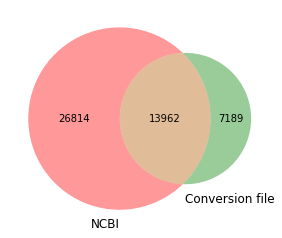

In [93]:
transcriptID_GeneID_ncbi = set(protein_transcript['transcript_ID_split_1'])
transcriptID_GeneID_convert = set(convert_table['transcript_ID_split_1'])
venn2(subsets = (len(transcriptID_GeneID_ncbi)-len(transcriptID_GeneID_convert.intersection(transcriptID_GeneID_ncbi)), 
                 len(transcriptID_GeneID_convert)-len(transcriptID_GeneID_convert.intersection(transcriptID_GeneID_ncbi)), 
                 len(transcriptID_GeneID_convert.intersection(transcriptID_GeneID_ncbi))), 
      set_labels = ('NCBI', 'Conversion file'))
plt.show()

# Make a .csv file with combined NCBI and Don Gilbert IDs
This will be >500 MB!!

In [395]:
# clean up unnecessary columns
#protein_connection = protein_connection.drop(columns = ['transcript_ID_split_2_x', 'transcript_ID_split_2_y'])
protein_connection.to_csv('protein_connection.csv')
protein_connection.shape

(1139717, 19)

### These are files Don Gilbert put together in response to difficulty submitting gene models to NCBI.

In [333]:
Don_submit = GFF3Parser(filename="../tmp_Fhet_files/kf2sub5_fc18w.gff3").read()

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/dammit/fileio/gff3.py:73: ParserWarning: Both a converter and dtype were specified for column attributes - only the converter will be used
  dtype=dict(self.columns)):


In [334]:
print(Don_submit.head())
print(Don_submit.shape)

                                                   Dbxref                 ID  \
0  NaN                                                NaN    Funhe2EKm000003   
1  NaN  CDD:200956,TrEMBL:UniRef50_Q90423,TrEMBL:HXB1B...  Funhe2EKm000003t1   
2  NaN                                                NaN                NaN   
3  NaN                                                NaN                NaN   
4  NaN                                                NaN                NaN   

                     Name             Parent Selcstop Split  \
0                     NaN                NaN      NaN   NaN   
1  Homeobox protein CDX-1                NaN      NaN   NaN   
2                     NaN  Funhe2EKm000003t1      NaN   NaN   
3                     NaN  Funhe2EKm000003t1      NaN   NaN   
4                     NaN  Funhe2EKm000003t1      NaN   NaN   

                    Target             aalen bestaa  ...    \
0                      NaN               NaN    NaN  ...     
1  Funhe2EKm0000

In [335]:
print(Don_submit.columns)

Index(['', 'Dbxref', 'ID', 'Name', 'Parent', 'Selcstop', 'Split', 'Target',
       'aalen', 'bestaa', 'cdsSize', 'cdsfix', 'cdsoff', 'cfix', 'cxlen',
       'end', 'equiv1', 'error', 'est', 'express', 'gapfill', 'gapfix',
       'gapfixan', 'gapnofix', 'gaps', 'gene', 'genegroup', 'ggap', 'inexon',
       'insrc', 'intr', 'intron', 'isoform', 'ix', 'locustag', 'lold',
       'mapCover', 'mgap', 'must', 'namepct', 'nameref', 'nexon', 'ocds',
       'oid', 'oldaw', 'oldcdo', 'oname', 'ortholog', 'osrc', 'paralog',
       'phase', 'phosphate carrier), member 25', 'pod', 'problem', 'protein',
       'quality', 'rseq', 'scold1', 'score', 'score_x', 'score_y', 'scoresum',
       'seqid', 'source', 'splice', 'splitdupid', 'start', 'strand', 'swapan',
       'swapmain', 'swapold', 'tblan', 'terepeat', 'transl_except', 'trg',
       'type', 'unspl', 'unsplaafix', 'unsplit', 'unsplt', 'unsplx'],
      dtype='object')


In [336]:
Don_submit_genemodels = Don_submit.drop_duplicates(subset='seqid')
print(Don_submit_genemodels.shape)

(4501, 81)


In [337]:
print(Don_submit_genemodels.head())

           Dbxref               ID Name Parent Selcstop Split Target aalen  \
0      NaN    NaN  Funhe2EKm000003  NaN    NaN      NaN   NaN    NaN   NaN   
14504  NaN    NaN  Funhe2EKm000224  NaN    NaN      NaN   NaN    NaN   NaN   
24636  NaN    NaN  Funhe2EKm000412  NaN    NaN      NaN   NaN    NaN   NaN   
32481  NaN    NaN  Funhe2EKm000507  NaN    NaN      NaN   NaN    NaN   NaN   
39329  NaN    NaN  Funhe2EKm000628  NaN    NaN      NaN   NaN    NaN   NaN   

      bestaa  ...   tblan terepeat transl_except  trg  type  unspl unsplaafix  \
0        NaN  ...     NaN      NaN           NaN  NaN  gene    NaN        NaN   
14504    NaN  ...     NaN      NaN           NaN  NaN  gene    NaN        NaN   
24636    NaN  ...     NaN      NaN           NaN  NaN  gene    NaN        NaN   
32481    NaN  ...     NaN      NaN           NaN  NaN  gene    NaN        NaN   
39329    NaN  ...     NaN      NaN           NaN  NaN  gene    NaN        NaN   

      unsplit unsplt unsplx  
0         NaN 

In [338]:
Don_genemodels = Don_submit.dropna(subset=['ID','Name','seqid']).drop_duplicates(subset='seqid')[['ID','Name','seqid']]

In [339]:
print(Don_genemodels.shape)

(4501, 3)


In [340]:
print(Don_genemodels.head())

                      ID                            Name       seqid
1      Funhe2EKm000003t1          Homeobox protein CDX-1  KN805525.1
14505  Funhe2EKm000224t1        Growth arrest-specific 8  KN805526.1
24637  Funhe2EKm000412t1  Piccolo (Aczonin)-like protein  KN805527.1
32482  Funhe2EKm000507t1  RAS guanyl-releasing protein 1  KN805528.1
39330  Funhe2EKm000628t1         Uncharacterized protein  KN805529.1


In [341]:
Don_submit_v18 = GFF3Parser(filename="../tmp_Fhet_files/kf2sub5_fc18w.gff3.liftdown").read()

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/dammit/fileio/gff3.py:73: ParserWarning: Both a converter and dtype were specified for column attributes - only the converter will be used
  dtype=dict(self.columns)):


In [342]:
v18_numbers = Don_submit_v18.dropna(subset=['ID','Name','seqid']).drop_duplicates(subset='seqid')[['ID','Name','seqid']]

In [343]:
print(v18_numbers.shape)

(4501, 3)


In [344]:
print(v18_numbers.head())

                      ID                            Name      seqid
1      Funhe2EKm000003t1          Homeobox protein CDX-1  Scaffold0
14505  Funhe2EKm000224t1        Growth arrest-specific 8  Scaffold1
24637  Funhe2EKm000412t1  Piccolo (Aczonin)-like protein  Scaffold2
32482  Funhe2EKm000507t1  RAS guanyl-releasing protein 1  Scaffold3
39330  Funhe2EKm000628t1         Uncharacterized protein  Scaffold4


# File from Jeff Miller

In [3]:
convert_table = pd.read_csv("Scaffold_names_conversion_table.csv")

In [4]:
convert_table.head()

,Assembly,original,corrected,RefSeq.Accession.version,GenBank.Accession.version,NCBI.name
0,Fundulus_heteroclitus-3.0.2,Scaffold0,Scaffold0,NW_012224401.1,KN805525.1,GPS_009135723.1
1,Fundulus_heteroclitus-3.0.2,Scaffold1,Scaffold1,NW_012224402.1,KN805526.1,GPS_009135724.1
2,Fundulus_heteroclitus-3.0.2,Scaffold2,Scaffold2,NW_012224403.1,KN805527.1,GPS_009135725.1
3,Fundulus_heteroclitus-3.0.2,Scaffold3,Scaffold3,NW_012224404.1,KN805528.1,GPS_009135726.1
4,Fundulus_heteroclitus-3.0.2,Scaffold4,Scaffold4,NW_012224405.1,KN805529.1,GPS_009135727.1


In [10]:
jeff_conversion = convert_table.dropna(subset=['original']).drop_duplicates(subset='RefSeq.Accession.version')[['RefSeq.Accession.version']]


In [11]:
jeff_conversion.shape

(10180, 1)